In [2]:
import pandas as pd
import dataframe_image as dfi

In [3]:
base = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'
sfco = 'sfcompo_mll_scikit_compare.pkl'
df = pd.read_pickle(base+sfco)

In [4]:
accs = {'Balanced Accuracy' : 'Bal Acc', 'Accuracy' : 'Acc'}
df.rename(columns=accs, inplace=True)
alg_rn = {'knn' : 'kNN', 'dtree' : 'DTree', 'mll' : 'MLL'}
null_rn = {'imputed-null' : 'Imputed Nulls', 'zero-null' : 'Zero-value Nulls'}
df.rename(columns=alg_rn, index=null_rn, inplace=True)

In [5]:
nulls = ['Imputed Nulls', 'Zero-value Nulls']
algs = ['kNN', 'DTree', 'MLL']

# SFCOMPO Results

### Reactor Type

In [36]:
acc_list = ['Acc', 'Acc CI']
df1 = df.loc[(nulls, 'reactor'), (algs, acc_list)]
acc_list = ['Bal Acc', 'BalAcc CI']
df2 = df.loc[(nulls, 'reactor'), (algs, acc_list)]
df3 = pd.concat([df1, df2], axis=1)
df3

Algorithm                        kNN               DTree                 MLL  \
Metric                           Acc    Acc CI       Acc    Acc CI       Acc   
NullHandling     PredParam                                                     
Imputed Nulls    reactor    0.522772  0.057256  0.600000  0.056157  0.386139   
Zero-value Nulls reactor    0.451485  0.057045  0.421782  0.056610  0.718812   

Algorithm                                  kNN               DTree            \
Metric                        Acc CI   Bal Acc BalAcc CI   Bal Acc BalAcc CI   
NullHandling     PredParam                                                     
Imputed Nulls    reactor    0.055809  0.090122  0.032825  0.115501  0.036639   
Zero-value Nulls reactor    0.051535  0.207605  0.046493  0.295921  0.052324   

Algorithm                        MLL            
Metric                       Bal Acc BalAcc CI  
NullHandling     PredParam                      
Imputed Nulls    reactor    0.000000    0.0000  
Zero-value Nulls reactor    0.631419    0.0553

In [37]:
acc_list = ['Acc', 'Bal Acc']
df1 = df.loc[(nulls, 'reactor'), (algs, acc_list)].round(2)
df1

Algorithm                    kNN         DTree           MLL        
Metric                       Acc Bal Acc   Acc Bal Acc   Acc Bal Acc
NullHandling     PredParam                                          
Imputed Nulls    reactor    0.52    0.09  0.60    0.12  0.39    0.00
Zero-value Nulls reactor    0.45    0.21  0.42    0.30  0.72    0.63

In [132]:
print(df1.to_string())

Algorithm                    kNN DTree   MLL
Metric                       Acc   Acc   Acc
NullHandling     PredParam                  
Imputed Nulls    reactor    0.52  0.60  0.39
Zero-value Nulls reactor    0.45  0.42  0.72


In [28]:
dfi.export(df1, './plots/sfcompo_reactor.png')

### Burnup

In [38]:
err_list = ['MAE', 'MAE Std']
df1 = df.loc[(nulls, 'burnup'), (algs, err_list)]
err_list = ['MAPE', 'MAPE Std']
df2 = df.loc[(nulls, 'burnup'), (algs, err_list)]
err_list = ['MedAE', 'IQR_25', 'IQR_75']
df3 = df.loc[(nulls, 'burnup'), (algs, err_list)]

In [39]:
err_list = ['MAE', 'MedAE',]# 'MAPE']
#err_list = 'MedAE'
df1 = df.loc[(nulls, 'burnup'), (algs, err_list)] / 1000
df1 = df1.round(2)
#print(df1.to_string())
df1

Algorithm                     kNN         DTree          MLL       
Metric                        MAE  MedAE    MAE MedAE    MAE  MedAE
NullHandling     PredParam                                         
Imputed Nulls    burnup      9.43   7.26  10.89  8.28  13.17  10.84
Zero-value Nulls burnup     14.88  11.47  15.18  8.79   3.53   1.70

In [30]:
dfi.export(df1, './plots/sfcompo_burnup.png')

### Enrichment

In [40]:
err_list = ['MAE', 'MAE Std']
df1 = df.loc[(nulls, 'enrichment'), (algs, err_list)]
err_list = ['MAPE', 'MAPE Std']
df2 = df.loc[(nulls, 'enrichment'), (algs, err_list)]
err_list = ['MedAE', 'IQR_25', 'IQR_75']
df3 = df.loc[(nulls, 'enrichment'), (algs, err_list)]

In [41]:
err_list = ['MAE', 'MedAE', 'MAPE']
df1 = df.loc[(nulls, 'enrichment'), (algs, err_list)].round(2)
df1

Algorithm                     kNN              DTree                MLL        \
Metric                        MAE MedAE   MAPE   MAE MedAE   MAPE   MAE MedAE   
NullHandling     PredParam                                                      
Imputed Nulls    enrichment  0.72  0.50  40.36  0.31  0.22  14.47  1.25  1.13   
Zero-value Nulls enrichment  1.67  2.02  55.80  0.36  0.22  12.85  0.49  0.35   

Algorithm                           
Metric                        MAPE  
NullHandling     PredParam          
Imputed Nulls    enrichment  66.02  
Zero-value Nulls enrichment  17.14

In [32]:
dfi.export(df1, './plots/sfcompo_enrichment.png')

# Intermediate results (where null values are imputed)
### Mean Abs Err

In [30]:
cols = ['kNN', 'kNN Std', 'DTree', 'DTree Std', 'MaxLL', 'MaxLL Std']
rows = ['Reactor Type Accuracy', 'Burnup Error [GWd/MTU]', 'Enrichment Error [%U235]']
blank = pd.DataFrame(index=rows, columns=cols)

In [29]:
sfco_mean_errs

,kNN,kNN Std,DTree,DTree Std,MaxLL,MaxLL Std
Reactor Type Accuracy,0.13,0.49,0.07,0.48,-0,0.49
Burnup MAE [GWd/MTU],9.54,8.6,7.44,8.58,12.57,10.47
Enrichment MAE [%U235],0.77,0.7,0.56,0.6,1.22,0.85


### Median Abs Err

In [30]:
sfco_med_errs

,kNN,kNN Std,DTree,DTree Std,MaxLL,MaxLL Std
Reactor Type Accuracy,0.13,0.49,0.07,0.48,-0,0.49
Burnup MAE [GWd/MTU],7.04,6.05,3.17,3.01,9.53,6.62
Enrichment MAE [%U235],0.46,0.3,0.31,0.19,0.99,0.51


# Old results (where null values were 0)

In [6]:
sfco_errs

,kNN,kNN Std,DTree,DTree Std,MaxLL,MaxLL Std
Reactor Type Accuracy,0.14,0.49,0.36,0.5,0.62,0.45
Burnup MAE [GWd/MTU],15.17,13.16,14.03,15.21,3.46,3.99
Enrichment MAE [%U235],1.48,1.08,0.33,0.37,0.48,0.54


In [107]:
sfco_errs #unbalanced accuracy

,kNN,kNN Std,DTree,DTree Std,MaxLL,MaxLL Std
Reactor Type Accuracy,0.61,0.49,0.51,0.5,0.72,0.45
Burnup MAE [GWd/MTU],15.17,13.16,14.03,15.21,3.46,3.99
Enrichment MAE [%U235],1.48,1.08,0.33,0.37,0.48,0.54


In [101]:
import dataframe_image as dfi
dfi.export(sfco_errs, 'sfcoerrs.png')

# SFCOMPO DB

In [16]:
sfco = pd.read_pickle('~/sfcompo/format_clean/sfcompo_nuc29.pkl')
#sfco.loc[sfco['Burnup'] < 1000]

In [17]:
import matplotlib.pyplot as plt

In [18]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

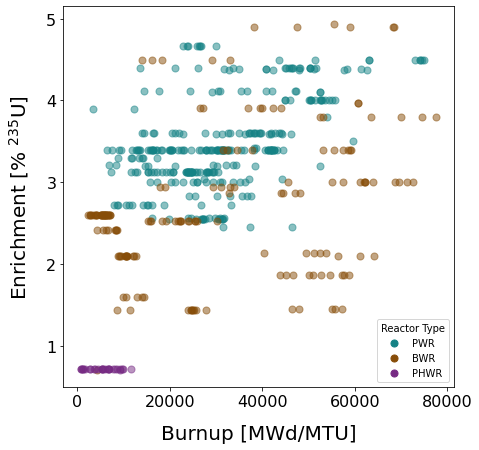

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_ylabel('Enrichment [% $^{235}$U]', fontsize=20, labelpad=15)
ax.set_xlabel('Burnup [MWd/MTU]', fontsize=20, labelpad=15)
rxtrs = ['pwr', 'bwr', 'phwr']
lbls = ['PWR', 'BWR', 'PHWR']
cdict = {'pwr' : colors['MTeal'], 
         'bwr' : colors['MBrwn'], 
         'phwr' : colors['MPurp']}
for i, rxtr in enumerate(rxtrs):
    sub = sfco.loc[sfco['ReactorType'] == rxtr]
    ax.scatter(sub['Burnup'], sub['Enrichment'], c = cdict[rxtr], s = 50, alpha = 0.5, label=lbls[i])
ax.tick_params(labelsize=16)

leg = ax.legend(loc='best', title='Reactor Type')
for lh in leg.legendHandles: lh.set_alpha(1)

fig.savefig('./plots/sfcompo_scatter_viz.png', bbox_inches='tight', transparent=True)
plt.show()

In [15]:
len(sfco.loc[sfco['ReactorType'] == 'pwr'])

312

In [16]:
len(sfco.loc[sfco['ReactorType'] == 'bwr'])

165

In [17]:
len(sfco.loc[sfco['ReactorType'] == 'phwr'])

28

In [40]:
sfco['OrigenReactor'].unique()

array(['Balakovo-2_VVER-1000', 'Balakovo-3_VVER-1000',
       'Calvert Cliffs-1_PWR', 'Cooper-1_BWR', 'Dodewaard-1_BWR',
       'Forsmark-3_BWR', 'Fukushima-Daini-1_BWR', 'Fukushima-Daini-2_BWR',
       'Garigliano-1_BWR', 'Genkai-1_PWR', 'Gundremmingen-1_BWR',
       'Gösgen-1_PWR', 'H.B. Robinson-2_PWR',
       'Japan Power Demonstration Reactor-1_BWR', 'Kalinin-1_VVER-1000',
       'Kola-3_VVER-440', 'Mihama-3_PWR', 'Monticello-1_BWR',
       'Neckarwestheim-2_PWR', 'Novovoronezh-3_VVER-440',
       'Novovoronezh-4_VVER-440', 'Novovoronezh-5_VVER-1000',
       'Nuclear Power Demonstration Reactor-1_CANDU', 'Obrigheim-1_PWR',
       'Ohi-1_PWR', 'Ohi-2_PWR', 'Pickering A-1_CANDU',
       'Quad Cities-1_BWR', 'Takahama-3_PWR', 'Three Mile Island-1_PWR',
       'Trino Vercellese-1_PWR', 'Tsuruga-1_BWR', 'Turkey Point-3_PWR',
       'Vandellos-2_PWR', 'Yankee-1_PWR'], dtype=object)

# Box Plots

In [22]:
base = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mllpath = base + 'mll/nuc_conc/sfco/'
mll_impnull = pd.read_csv(mllpath + 'Job0_unc0.01_impnull/Job0_unc0.01_impnull.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
mll_0null = pd.read_csv(mllpath + 'Job1_unc0.01_0null/Job1_unc0.01_0null.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [23]:
mll_impnull['Enrichment_Error'].describe()

count    505.00000
mean       1.25397
std        0.88790
min        0.00100
25%        0.57000
50%        1.13000
75%        1.70400
max        3.66000
Name: Enrichment_Error, dtype: float64

In [8]:
#mll_impnull.loc[mll_impnull['Enrichment_Error'] > 2.2, ['Enrichment', 'pred_Enrichment', 'Enrichment_Error']]

In [18]:
idx = mll_impnull.loc[mll_impnull['ReactorType'] != 'phwr'].index

In [24]:
scipath = base + 'scikit/nuc_conc/sfco/'
nulls = ['impnull', '0null']
Nulls = ['Imputed Nulls', 'Zero-value Nulls']
algs = ['knn', 'dtree', 'mll']
preds = ['reactor', 'burnup', 'enrichment', 'cooling']
#predmll = {'reactor' : 'ReactorType_Score',
#           'burnup' : 'Burnup_Error',
#           'enrichment' : 'Enrichment_Error',
#           'cooling' : 'CoolingTime_Error'}
predmll = {'reactor' : 'ReactorType',
           'burnup' : 'Burnup',
           'enrichment' : 'Enrichment',
           'cooling' : 'CoolingTime'}
errname = 'AbsError'
mlls = [mll_impnull, mll_0null]

In [27]:
def boxplots(pred, null_idx):
    sv_base = 'plots/sfcompo_boxplots_' + nulls[null_idx]
    if pred == 'burnup':
        axlbl = 'Burnup Error [MWd/MTU]'
        #axlbl = 'Relative Error % [MWd/MTU]'
        sv_fig = sv_base + '_pcterr_burn.png'
    else: #pred == 'enrichment':
        axlbl = 'Enrichment Error [% $^{235}$U]'
        #axlbl = 'Relative Error % [% $^{235}$U]'
        sv_fig = sv_base + '_enri.png' #_pcterr
    
    csv_end = '_tset1.0_nuc29_' + nulls[null_idx] + '_ext_test_compare.csv'
    knncsv = pred + '_knn' + csv_end
    dtrcsv = pred + '_dtree' + csv_end
    # abs err:
    knn = pd.read_csv(scipath + knncsv).drop(columns='Unnamed: 0')[errname]
    dtr = pd.read_csv(scipath + dtrcsv).drop(columns='Unnamed: 0')[errname]
    mll = mlls[null_idx][predmll[pred]+'_Error']
    # rel err:
    #knndf = pd.read_csv(scipath + knncsv).drop(columns='Unnamed: 0')
    #dtrdf = pd.read_csv(scipath + dtrcsv).drop(columns='Unnamed: 0')
    #mlldf = mlls[null_idx]
    #knn = 100 * knndf[errname] / knndf['TrueY']
    #dtr = 100 * dtrdf[errname] / dtrdf['TrueY']
    #mll = 100 * mlldf[predmll[pred]+'_Error'] / mlldf[predmll[pred]]
    
    data = data = [knn, dtr, mll] #[knn.loc[idx], dtr.loc[idx], mll.loc[idx]]
    lbls = ['kNN', 'DTree', 'MLL Calc']
    
    fig, ax = plt.subplots(figsize=(6, 5))
    #ax.set_title(Nulls[null_idx], fontsize=20, pad=15)
    medianprops = dict(linestyle='-.', linewidth=2.5, color='w')
    meanpointprops = dict(markeredgecolor='w', markerfacecolor='cornsilk')
    bplot = ax.boxplot(data, notch=True, labels=lbls, patch_artist=True, showmeans=True, 
                       meanprops=meanpointprops, medianprops=medianprops)
    
    c = [colors['MBrwn'], colors['MTeal'], colors['MPurp']]
    for patch, color in zip(bplot['boxes'], c):
        patch.set_facecolor(color)
    
    ax.set_ylabel(axlbl, fontsize=18, labelpad=15)
    ax.set_xlabel('Algorithm', fontsize=18, labelpad=15)
    ax.yaxis.grid(True)
    ax.tick_params(labelsize=14)
    
    #get info about boxplots
    kfly = bplot["fliers"][0].get_data()[1]
    dfly = bplot["fliers"][1].get_data()[1]
    mfly = bplot["fliers"][2].get_data()[1]
    print(len(kfly), len(dfly), len(mfly))
    
    plt.show()
        
    return fig, ax, sv_fig

71 65 60


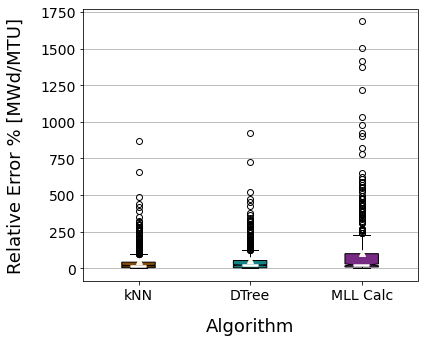

0 0 43


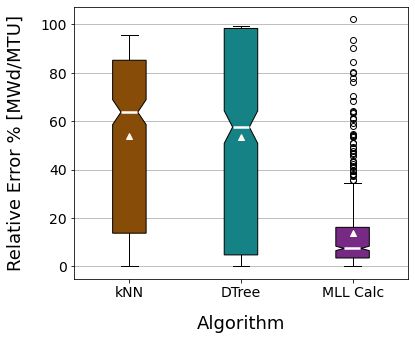

In [39]:
fig, ax, sv_fig = boxplots('burnup', 0)
#fig.savefig(sv_fig, bbox_inches='tight', transparent=True)
fig, ax, sv_fig = boxplots('burnup', 1)
#fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

0 30 16


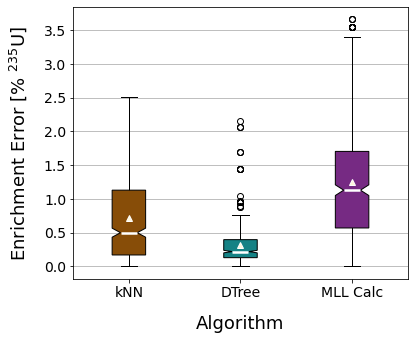

0 45 16


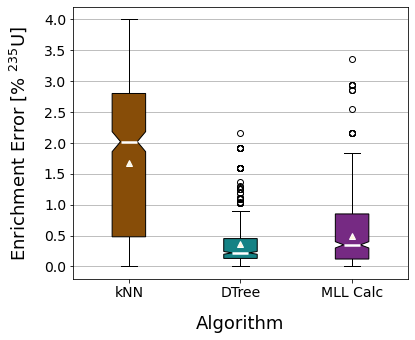

In [28]:
fig, ax, sv_fig = boxplots('enrichment', 0)
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)
fig, ax, sv_fig = boxplots('enrichment', 1)
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)